In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df_cc = pd.read_csv('Credit Card Customer Data.csv')
print(df_cc.shape)
df_cc.head(2)

(660, 7)


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9


In [4]:
print(df_cc.isnull().sum())

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [5]:
# drop unnecessary columns
df_cc = df_cc.drop(columns=['Customer Key'])
df_cc = df_cc.drop(columns=['Sl_No'])

In [6]:
df_cc.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


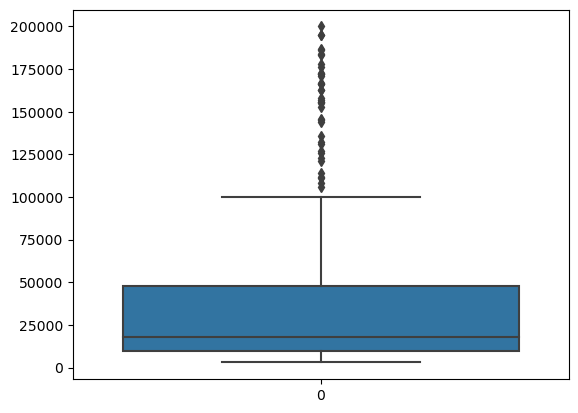

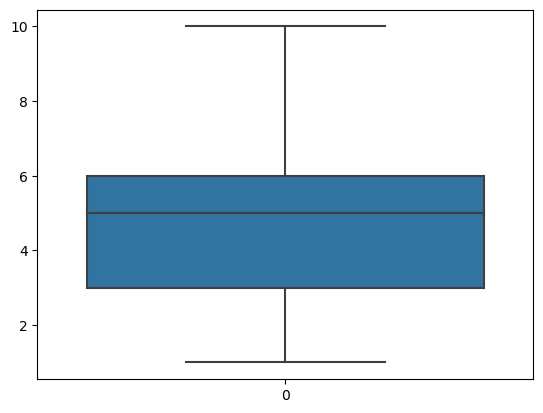

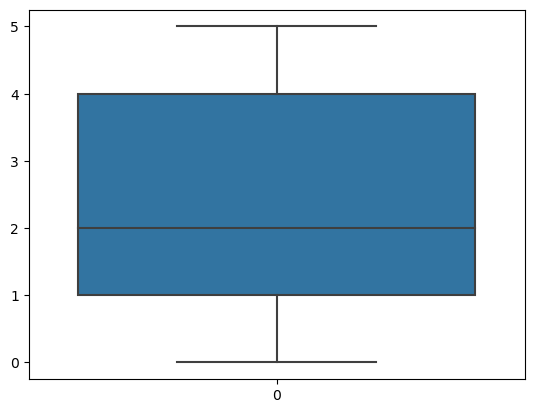

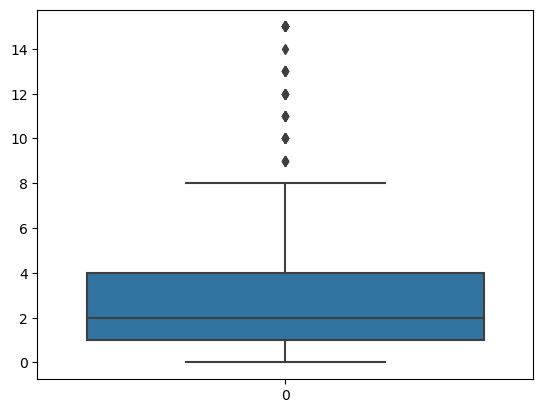

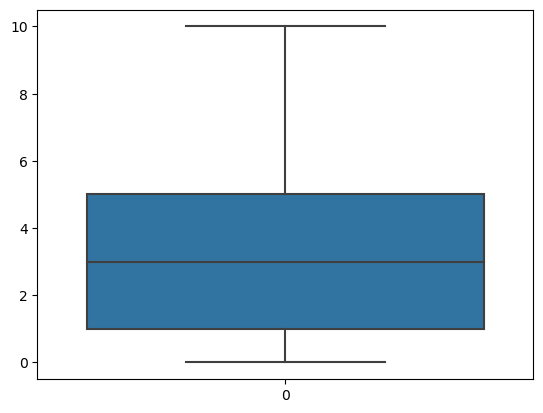

In [7]:
import seaborn as sns 
for column in df_cc.columns:
    sns.boxplot(df_cc[column])
    plt.show()

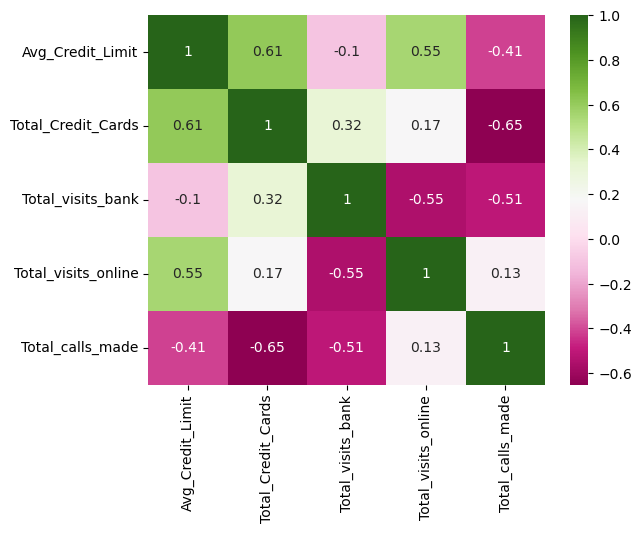

In [8]:
corr = df_cc.corr()
sns.heatmap(corr, annot=True,cmap="PiYG")
plt.show()

In [9]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cc)

In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [11]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [12]:
from sklearn.metrics import silhouette_score
print(f'Silhouette score: {silhouette_score(df_scaled, pred_y)}')

Silhouette score: 0.5157182558881063


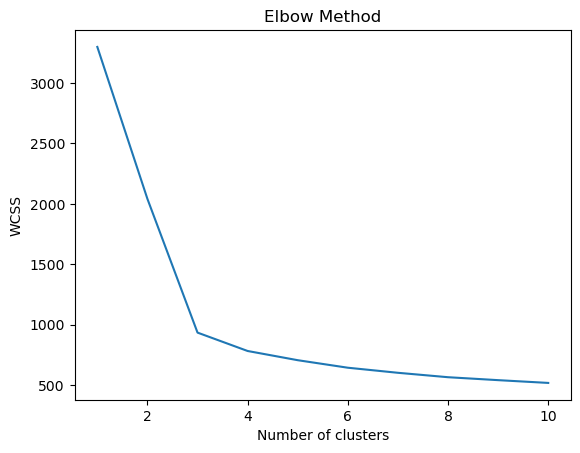

In [13]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
df_cc['label'] = pred_y

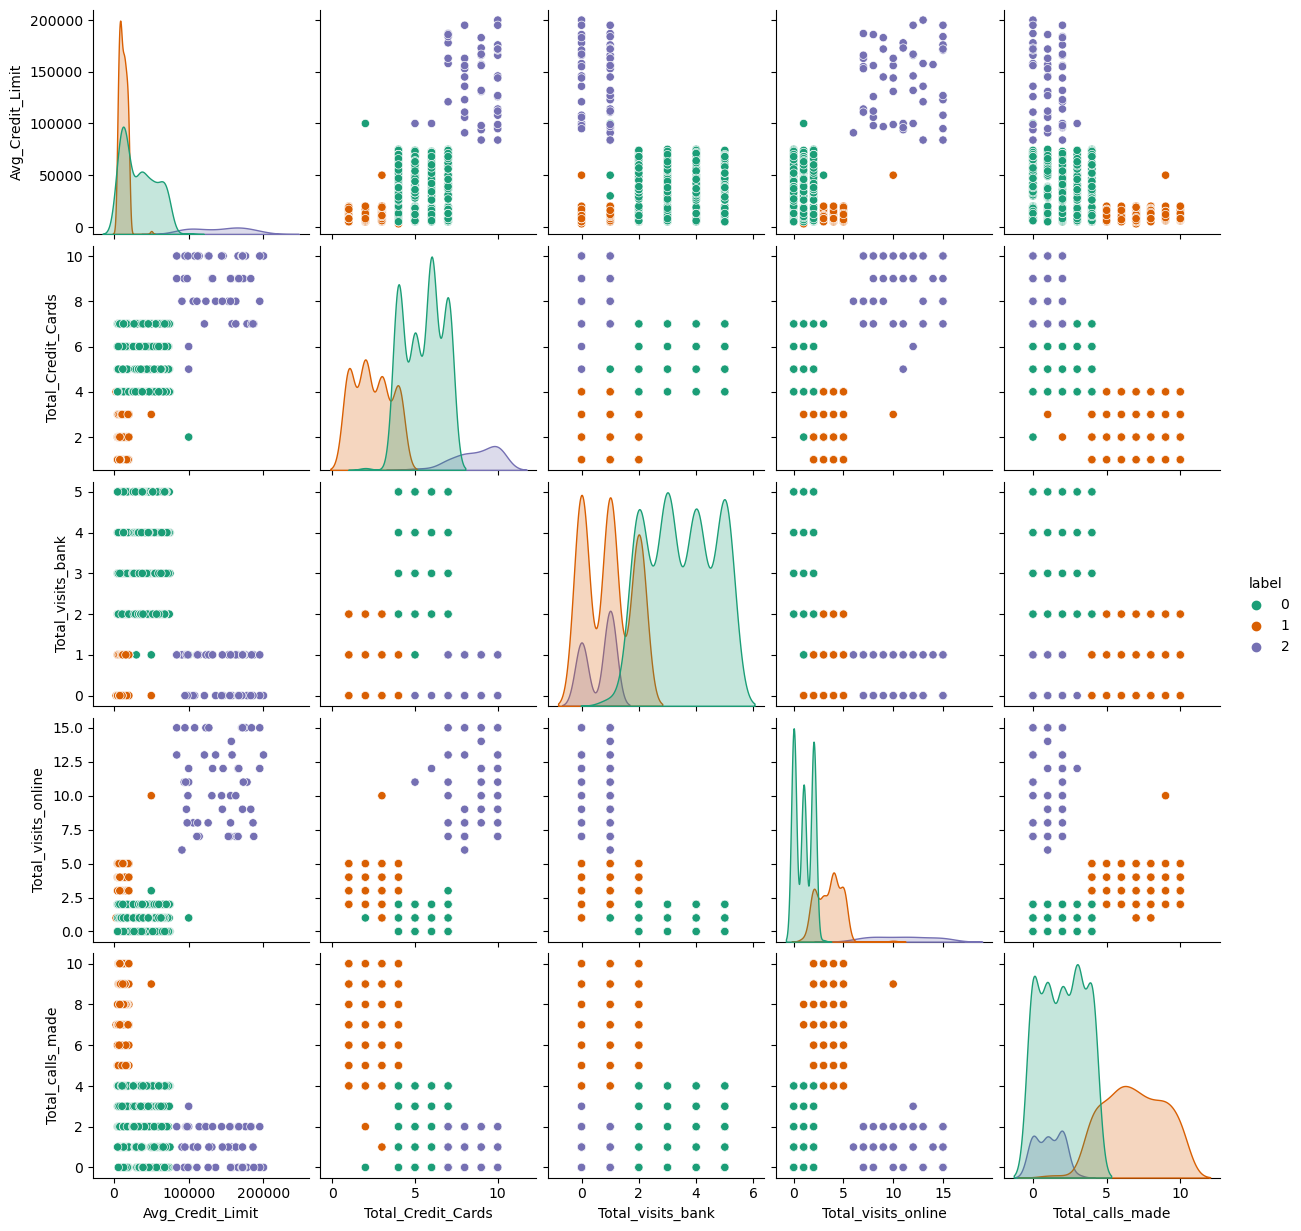

In [15]:
sns.pairplot(df_cc,hue='label', palette='Dark2')
plt.show()

In [17]:
print("Centroids:", kmeans.cluster_centers_)
print("Silhouette score:", silhouette_score(df_scaled, pred_y))

Centroids: [[-0.02106178  0.37368962  0.6663945  -0.55367163 -0.55300488]
 [-0.59579625 -1.05962278 -0.9015185   0.32299678  1.14810882]
 [ 2.83176409  1.86222621 -1.10576269  2.82731942 -0.87432983]]
Silhouette score: 0.5157182558881063


In [18]:
country_df = pd.read_csv('Country-data.csv')
country_df.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460


In [19]:
numeric_df = country_df.drop(columns=['country'])
numeric_df.head(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


In [20]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numeric_df)
scaled_df = pd.DataFrame(scaled_df, columns=numeric_df.columns)
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [21]:
# create the linkage matrix
Z = linkage(scaled_df, 'complete')

In [22]:
# create the linkage matrix
Z = linkage(scaled_df, 'complete')# create the linkage matrix
Z = linkage(scaled_df, 'complete')# create the linkage matrix
Z = linkage(scaled_df, 'complete')

In [23]:
clusters = fcluster(linkage(scaled_df, method='complete'), 4, criterion='maxclust')

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
df_pca = pca.fit_transform(scaled_df)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])

In [25]:
scaled_df['label']=clusters

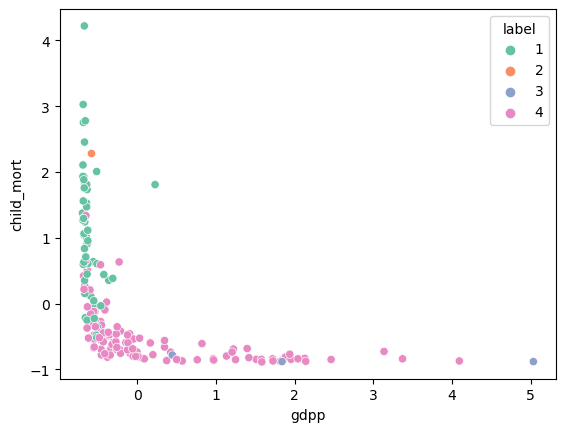

In [26]:
sns.scatterplot(x='gdpp',y='child_mort',hue='label', data=scaled_df,palette='Set2')
plt.show()